# Lab 3

## Diego and Julia

### February 19, 2024

Introduction: We will use an LCR meter to measure the effect of paper, a dialectric material, on the capacitance a pair of aluminum plates acting as capacitors, and determine the k constant of paper.

Set up: In this lab, we meaure the capacitance between two equally sized plates with varying paper thicknesses between them. The two plates are charged with opposite charges and placed directly one on top of the other. An LCR meter provides the charge and measures the voltage to calculate and display the Capacitance of the system. The thickness of the paper is determined by measuring the thickness of all the papers together with e-calipers and dividing it by the total to find the thickness of one paper and minimize error; the number is then multiplied by however many papers are used in each trial. The cylindrical black weight is used to compress the paper and minimize air between the plates.

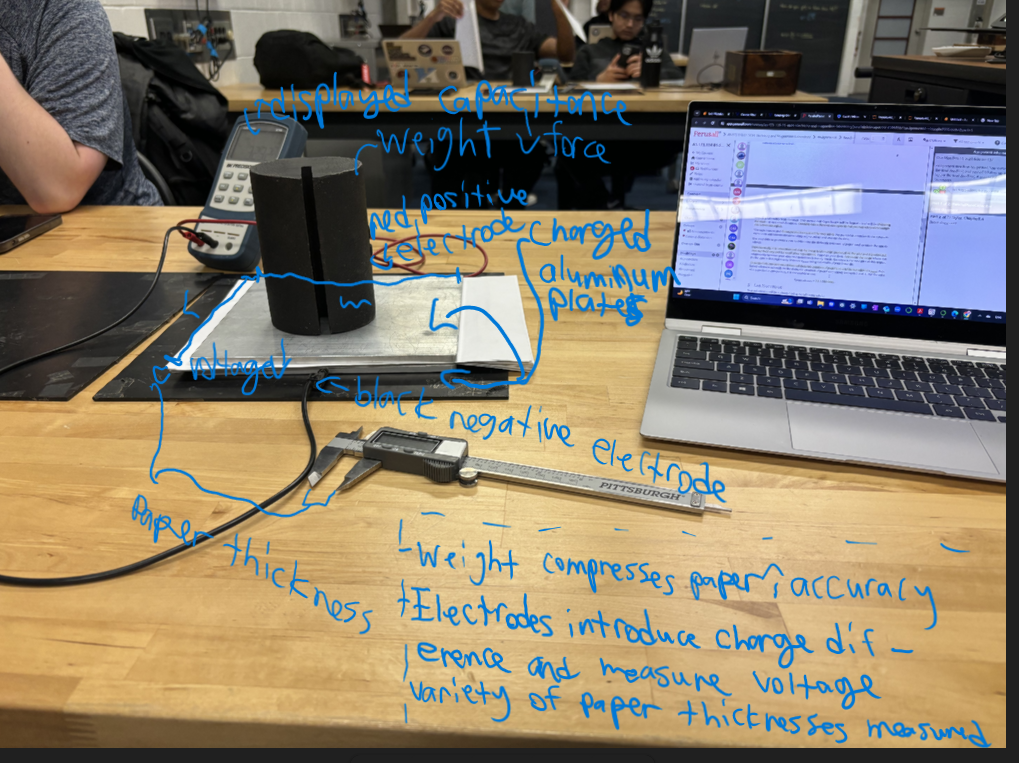

Data consists of repeatedly measuring the capacitance with varying amounts of paper between the plates.

After collecting the measurements, the data is analyzed using python.

First we import a variety of modules which might be useful.

In [1]:
#importing all potentioally necessary mods
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import math

import numpy as np

import scipy.optimize as opt

Then, we take our data, drop the range of data that shows abnormal behavior, and calculate some additional data columns(1/distance and plate area). For the new data sets, error is propogated.

In [2]:
datainitial = pd.read_excel("datalab3.xlsx")
data=datainitial.drop(datainitial[datainitial['Distance (mm)'] < 1].index)  
data['1/Distance (1/mm)']= 1/data['Distance (mm)']
x = 20.4*20.3
data['plate area (square cm)']= 414
data['d 1/Distance (1/mm)']= (data['dDistance (mm)']/data['Distance (mm)'])*data['1/Distance (1/mm)']

With this set of data, we can start graphing and modeling to find k of paper. First we make a model. The slope is important for our future calculations. We need a linear model of Capacitance vs Inverse of Distance.

In [3]:
#Define a model
def linmodel(x, A, B):
    y =  A*x+B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, data['1/Distance (1/mm)'],
                            data['Capacitance (nF)'],
                            sigma=data['d 1/Distance (1/mm)'],
                            absolute_sigma=True) 
                            
    
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])  


In [4]:
#modify to include xerr
data['yerrto'] = fitA *data['d 1/Distance (1/mm)'] + data['dCapacitance']

In [5]:
#Define a model to determine the values for our equation
def linmodel(x, A, B):
    y =  A*x+B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, data['1/Distance (1/mm)'],
                            data['Capacitance (nF)'],
                            sigma=data['yerrto'],
                            absolute_sigma=True) 
                            
    
# The value of A, the uncertainty in A
fitAx = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitBx = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])    

#here are our values

print(f'{fitAx:.2f} +/- {fitdA:.2f} nF*mm')
print(f'{fitBx:.2f} +/- {fitdB:.2f} nF')

0.75 +/- 0.01 nF*mm
0.06 +/- 0.01 nF


With the model generated, we overlay it on a graph of the relevant data.

(0.3, 1.0)

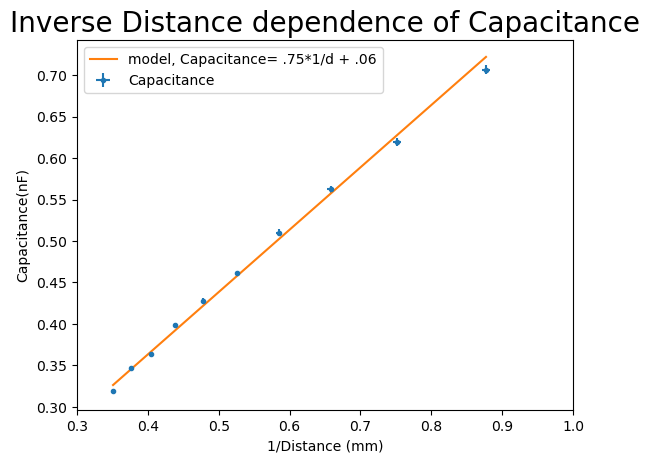

In [6]:
plt.errorbar(data['1/Distance (1/mm)'], data['Capacitance (nF)'], yerr=data['dCapacitance'], 
             xerr=data['d 1/Distance (1/mm)'], fmt=".", label='Capacitance')

plt.plot(data['1/Distance (1/mm)'], linmodel(data['1/Distance (1/mm)'], 
                                                   fitA, fitB), label='model, Capacitance= .75*1/d + .06')
plt.legend()
plt.xlabel('1/Distance (mm)')
plt.ylabel('Capacitance(nF)')
plt.title('Inverse Distance dependence of Capacitance', fontsize = 20)
plt.xlim(.3,1)


Capacitance and distance error is calculated using guides from the instruments manufacturers' and can be viewed in the data sheet. Next, we must calculate k and the error associated with the measurement. Some considerations: our slope is in nF*mm and our area is in cm^2; both of these will need conversions in the calculations.

In [7]:
k = (fitA * 10**-9 * 10**-3)/(8.85 * 10**-12 * (414 * (1/100)**2))
print(f'K={k:.2f}')

K=2.05


error must also be propogated. k is our slope divided by epsilon naught times A. A is area with an error of 1 cm. This leaves us with a fairly easy error propogation where we just add the percent errors of the area and the slope.

In [8]:
kerror = (fitdA * 10**-9 * 10**-3)/(fitA * 10**-9 * 10**-3) + 1/414
kerror=kerror*k
print(f'Error is +/- {kerror:.2f}')

Error is +/- 0.04


Results, Error, and Significance:

Our experimental k value for paper is 2.05+-.04

k is a constant which signifies the ratio of the permitivity constant of the material over the permitivity of a vacuum; it's usually multiplied by the permitivitty of a vacuum to get the permitivity of just the material. It is important because it has an effect on Capacitance:

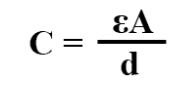

As you can see, Capacitance increases with the permitivity constant, so using dialectrics can be a useful way to increase capacitance.

Paper typically has a k value between 2 and 4. Our experiment yielded a value of 2.05+-.04. These are very good values as they completely overlap. I think we did a good job of minimizing most error. The remaining error is bits and pieces from a variety of sources: the LCR meter, calipers, air and impurities between the aluminum plates, error in measuring the area of the plates, and slight disalignment of the plates. Of these, the measurements of the plates' areas were likely the greatest source for error. performing a t-test, we get (3-2.04)/(1+.04)=.92, which is an excellent t value.



In [ ]:
def linmodel(x, A, B):
    y =  A*x**B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, DBdata['Current (nA)'],
                            DBdata['Voltage (V)'],
                            sigma=DBdata['dVoltage (V)'],
                            absolute_sigma=True) 
                            
    
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])

In [ ]:
#modify to include xerr
DBdata['yerrto'] = np.sqrt(((fitA *fitB*DBdata['Current (A)'])**(fitB-1)*DBdata['dCurrent (A)'])**2 + (DBdata['dVoltage (V)'])**2)

In [ ]:
def linmodel(x, A, B):
    y =  A*x+B
    return y

fit_param, fit_param_errors = opt.curve_fit( linmodel, DBdata['Current (A)'],
                            DBdata['Voltage (V)'],
                            sigma=DBdata['yerrto'],
                            absolute_sigma=True )
# The value of A, the uncertainty in A
fitA = fit_param[0]
fitdA = np.sqrt(fit_param_errors[0,0])   

# The value of B, the uncertainty in B
fitB = fit_param[1]
fitdB = np.sqrt(fit_param_errors[1,1])    

#here are our values

print(f'{fitA:.0f}, +- {fitdA:.0f} hmmm')
print(f'{fitB:.0f}, +- {fitdB:.0f} hmmm')

In [ ]:
plt.errorbar(DBdata['Current (A)'], DBdata['Voltage (V)'], yerr=DBdata['dVoltage (V)'], xerr=DBdata['dCurrent (A)'], fmt="o", label='Data')

plt.plot(DBdata['Current (A)'], linmodel(DBdata['Current (A)'], fitA, fitB), label='model')

plt.errorbar(DFdata['Current (A)'], DFdata['Voltage (V)'], yerr=DFdata['dVoltage (V)'], xerr=DFdata['dCurrent (A)'], fmt="o", label='Data')

plt.plot(DFdata['Current (A)'], linmodel(DFdata['Current (A)'], fitA, fitB), label='model')